## EDA 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,excel_yn,aws_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,48,1,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,37,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,11,1,0,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,56,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,23,1,0,0,1,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'aws_yn'],
      dtype='object')

## Title simplifier and seniority classification

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principle' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['job_simp'].value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        544
senior    195
junior      3
Name: seniority, dtype: int64

## fix Los Angeles

In [10]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'CA' )

In [11]:
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
UT     10
IN     10
MO      9
AZ      9
AL      8
GA      6
MI      6
KY      6
DE      6
CT      5
IA      5
OR      4
NE      4
LA      4
NM      3
KS      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

## job description length


In [12]:
df['job_desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [13]:
df['job_desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: job_desc_len, Length: 742, dtype: int64

## Compitetor count

In [14]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [15]:
df.num_comp.head()

0    0
1    0
2    0
3    3
4    3
Name: num_comp, dtype: int64

In [16]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'aws_yn', 'job_simp',
       'seniority', 'job_desc_len', 'num_comp'],
      dtype='object')

## convert hourly salary to annual

In [18]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)

In [19]:
df['min_salary'].head()

0    53
1    63
2    80
3    56
4    86
Name: min_salary, dtype: int64

In [20]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [21]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [22]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [23]:
df.company_txt


0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

# EDA

In [24]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,same_state,age,python_yn,R_yn,spark_yn,excel_yn,aws_yn,job_desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.522911,0.237197,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.499812,0.425651,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'aws_yn', 'job_simp',
       'seniority', 'job_desc_len', 'num_comp'],
      dtype='object')

<AxesSubplot:xlabel='Rating', ylabel='Count'>

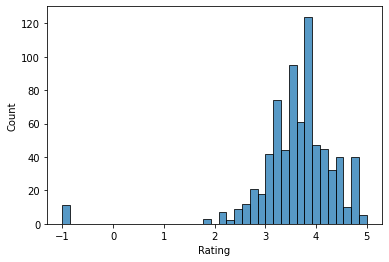

In [39]:
# histogram of Rating
sns.histplot(df['Rating'])

<AxesSubplot:xlabel='average_salary', ylabel='Count'>

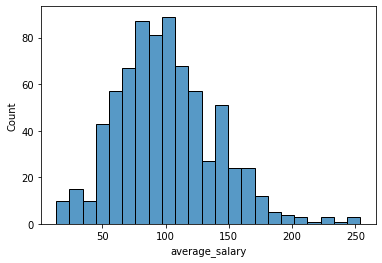

In [40]:
# histogram of average salary
sns.histplot(df['average_salary'])

<AxesSubplot:xlabel='min_salary', ylabel='Count'>

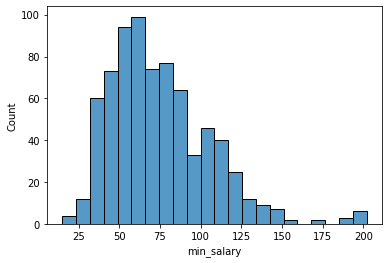

In [41]:
# hist of min salary
sns.histplot(df['min_salary'])

<AxesSubplot:xlabel='max_salary', ylabel='Count'>

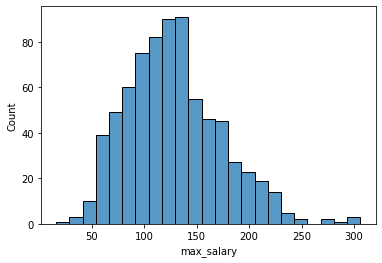

In [42]:
# hist of max salary
sns.histplot(df['max_salary'])

<AxesSubplot:xlabel='age', ylabel='Count'>

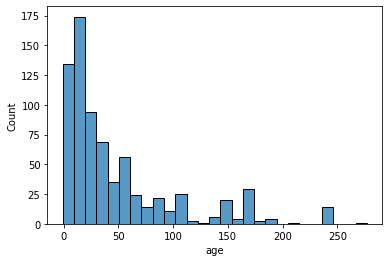

In [43]:
#age
sns.histplot(df['age'])
# as the age is not normally distributed we cannot use is for regular regression 
# so in future we might need to normalize the data 

<AxesSubplot:xlabel='job_desc_len', ylabel='Count'>

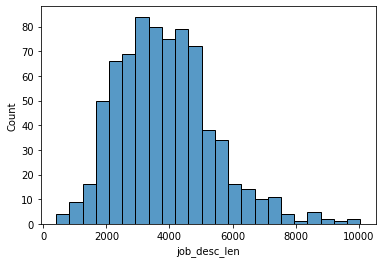

In [44]:
# description length
sns.histplot(df['job_desc_len'])

<AxesSubplot:>

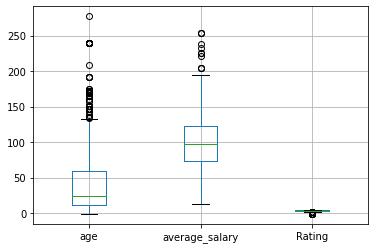

In [45]:
df.boxplot(column=['age','average_salary','Rating'])

<AxesSubplot:>

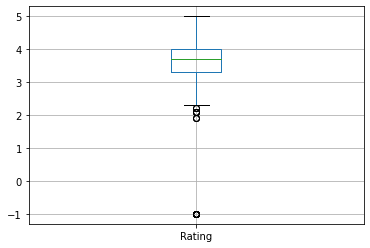

In [46]:
df.boxplot(column=['Rating'])

<AxesSubplot:>

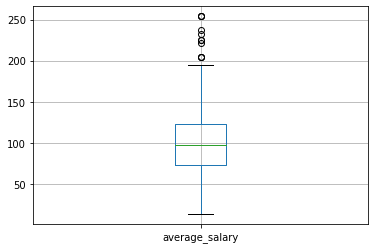

In [47]:
df.boxplot(column=['average_salary'])

In [48]:
df[['age','average_salary','Rating','job_desc_len']].corr()

,age,average_salary,Rating,job_desc_len
age,1.000000,0.019574,0.023162,0.164188
average_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
job_desc_len,0.164188,0.078808,-0.012281,1.000000


In [49]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'aws_yn', 'job_simp',
       'seniority', 'job_desc_len', 'num_comp'],
      dtype='object')

In [50]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership','Industry','Sector','Revenue','company_txt','job_state','same_state','python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'aws_yn', 'job_simp',
       'seniority']]

graph for Location: total = 200


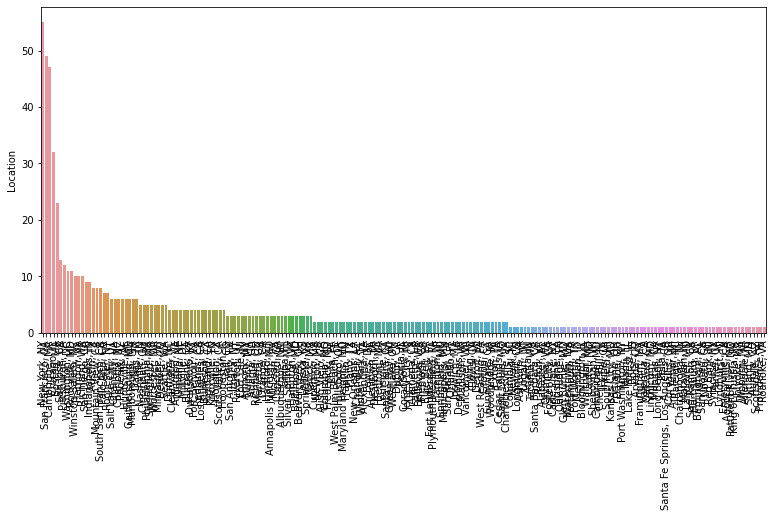

graph for Headquarters: total = 198


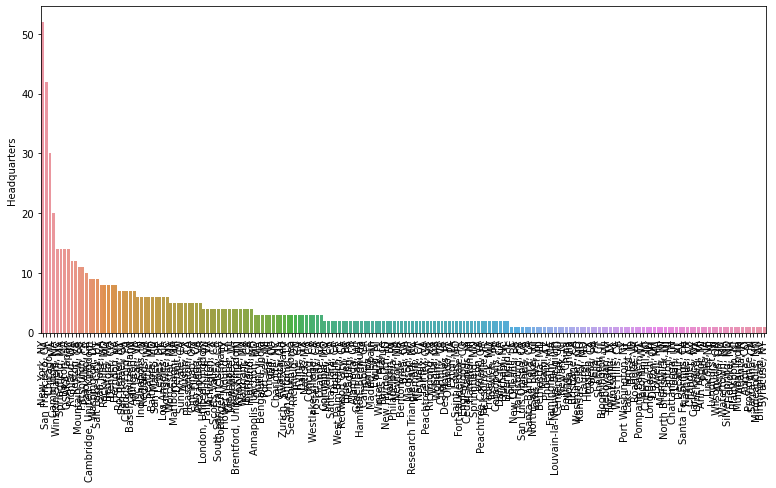

graph for Size: total = 9


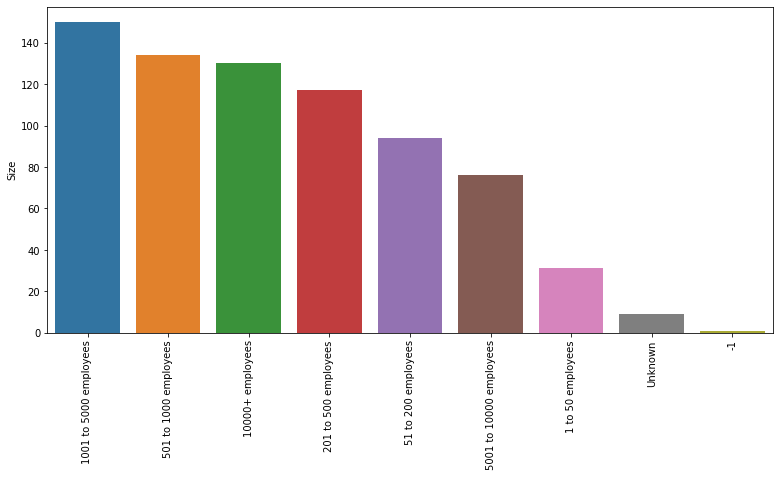

graph for Type of ownership: total = 11


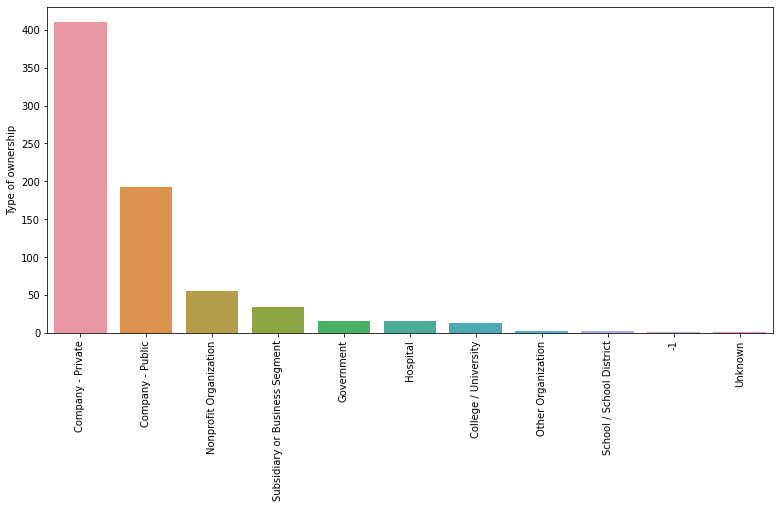

graph for Industry: total = 60


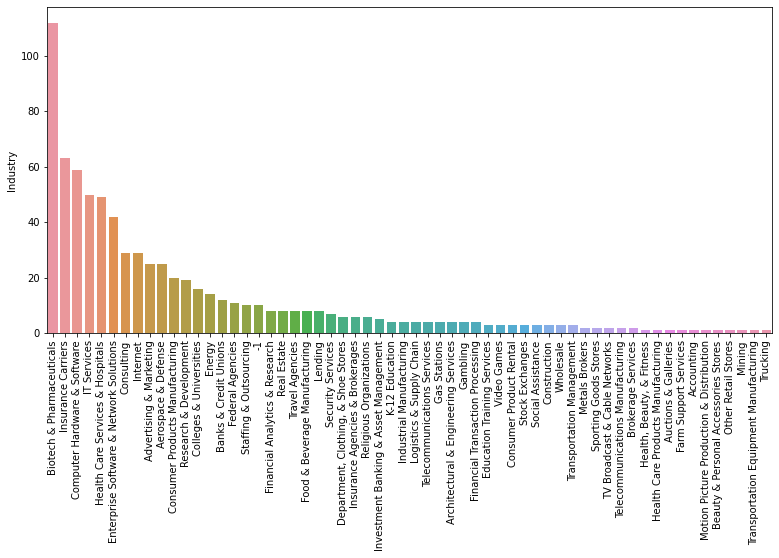

graph for Sector: total = 25


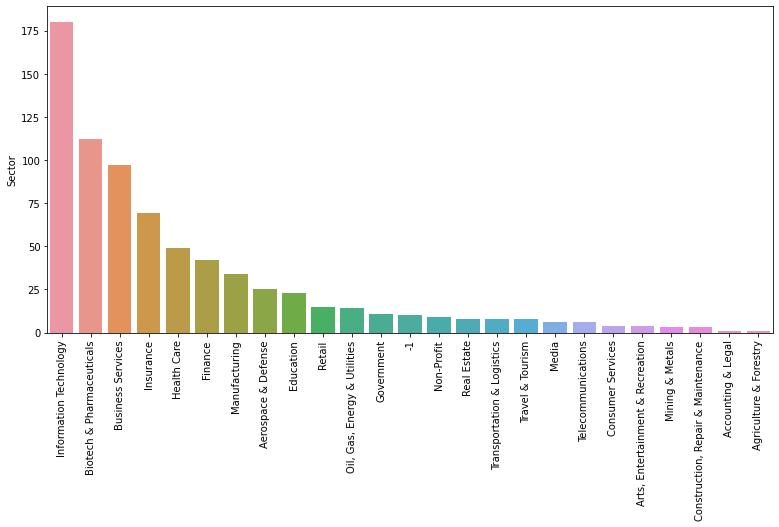

graph for Revenue: total = 14


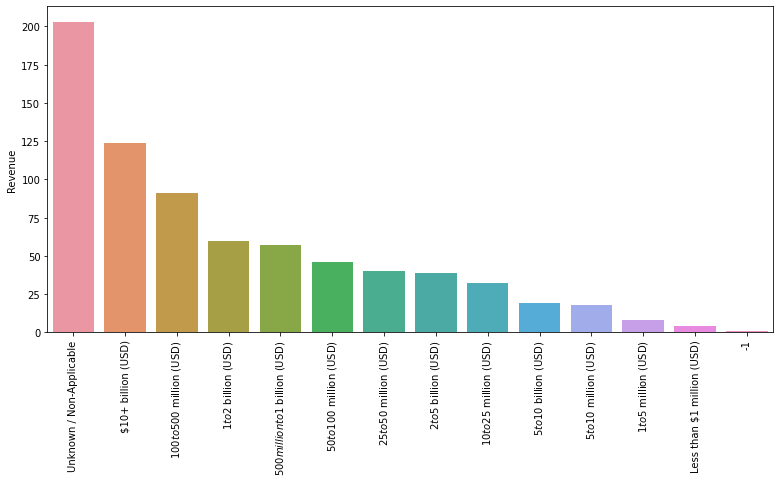

graph for company_txt: total = 343


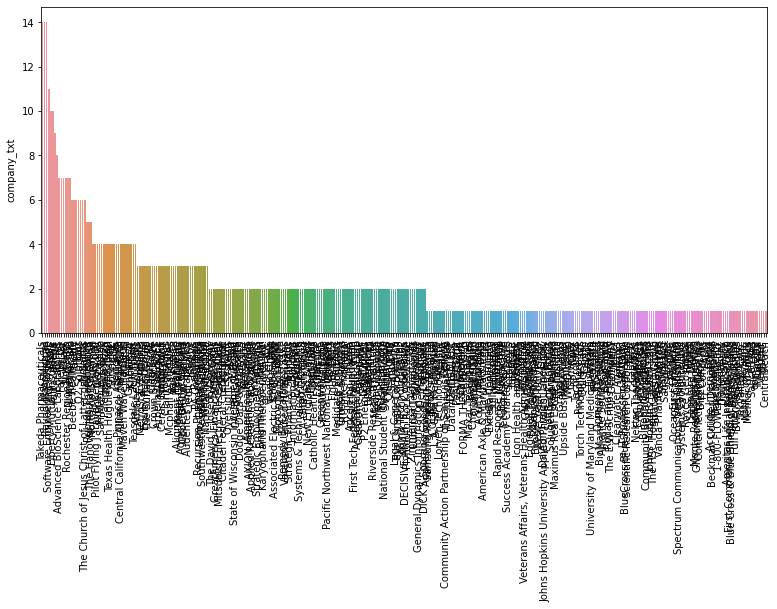

graph for job_state: total = 37


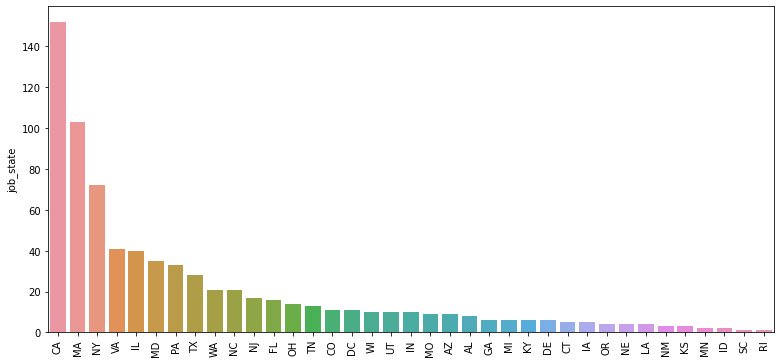

graph for same_state: total = 2


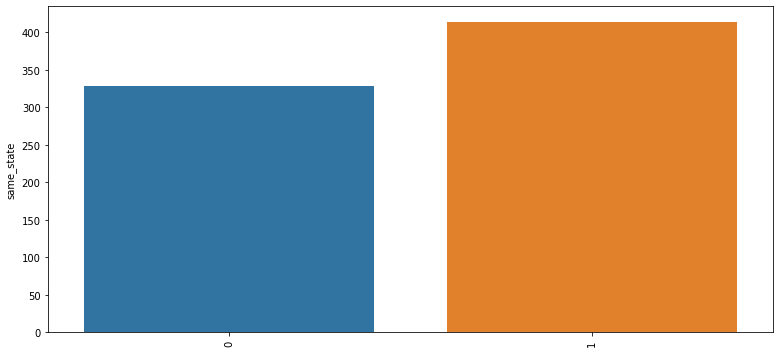

graph for python_yn: total = 2


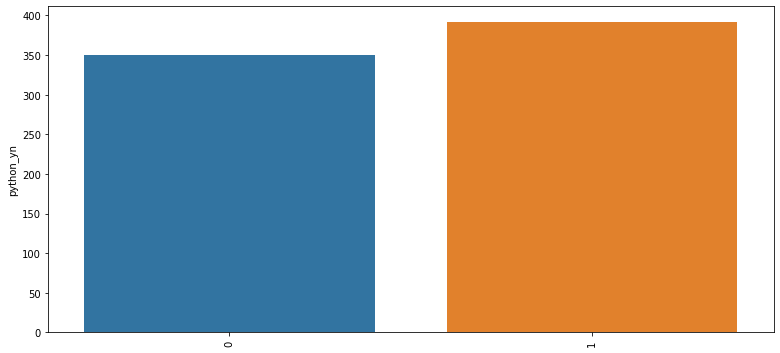

graph for R_yn: total = 2


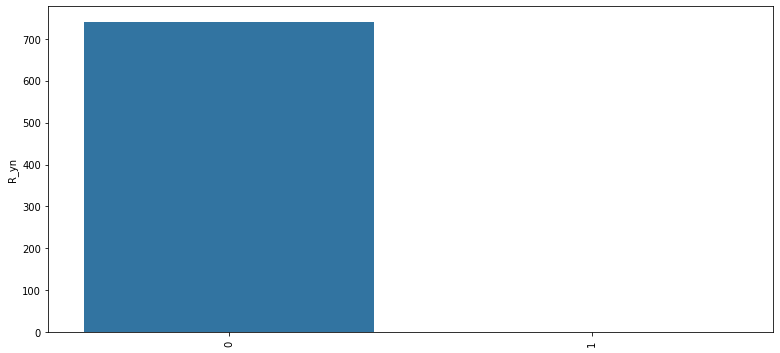

graph for spark_yn: total = 2


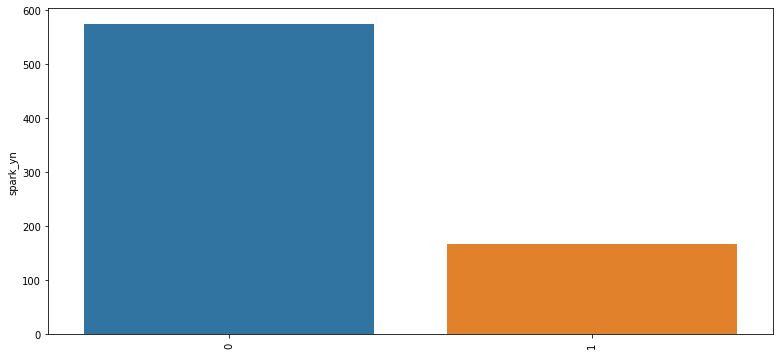

graph for excel_yn: total = 2


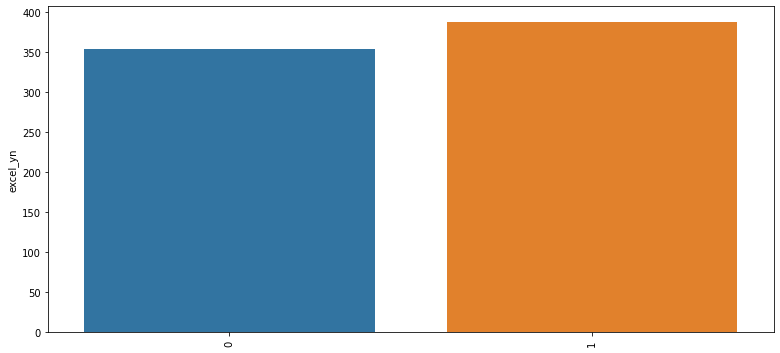

graph for aws_yn: total = 2


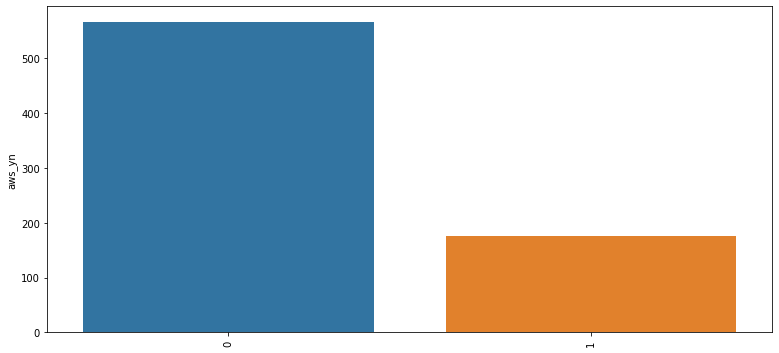

graph for job_simp: total = 7


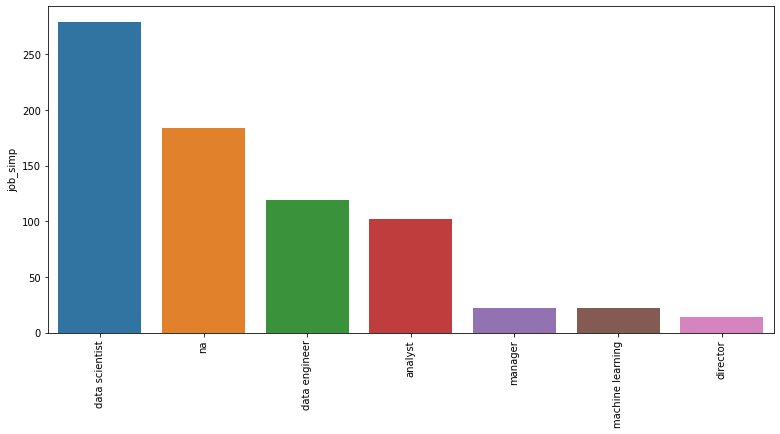

graph for seniority: total = 3


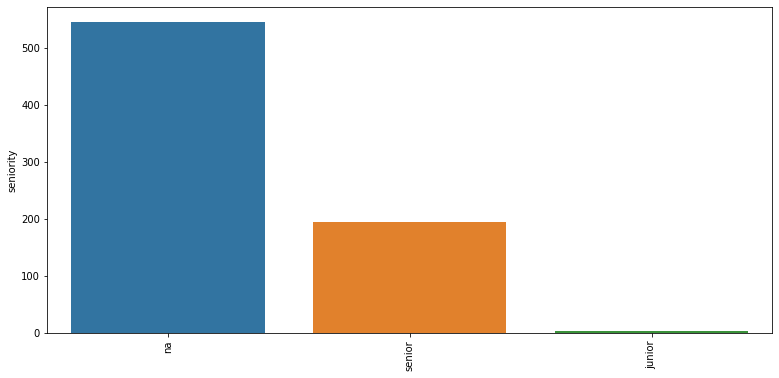

In [64]:
for i in df_cat.columns:
    plt.figure(figsize=(13,6))
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


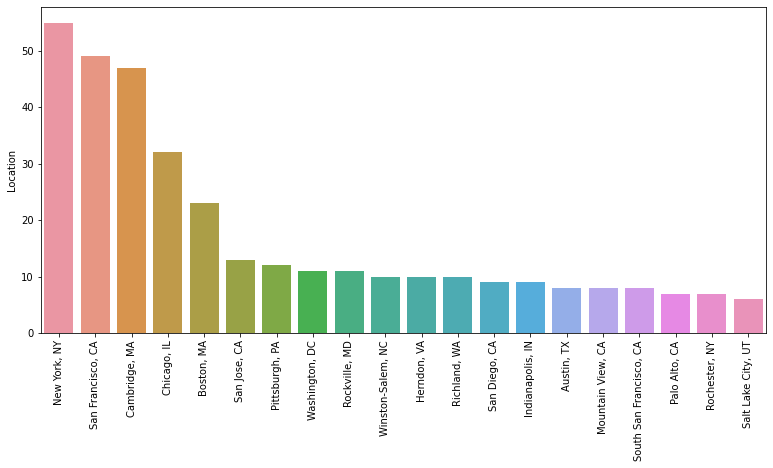

graph for Headquarters: total = 20


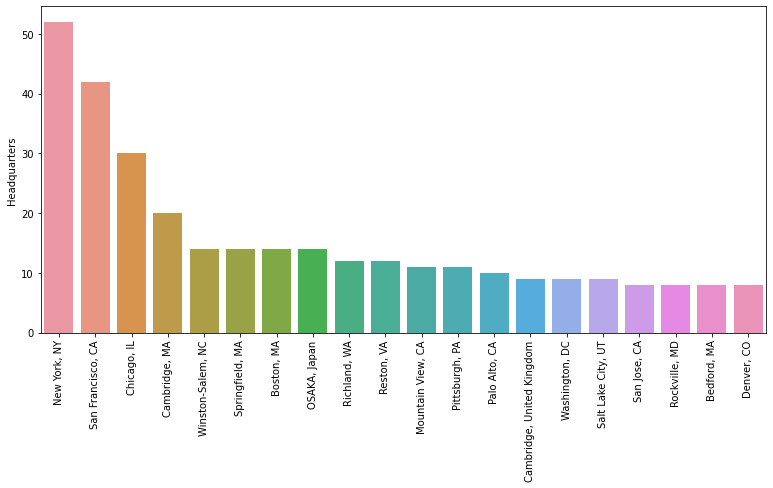

graph for company_txt: total = 20


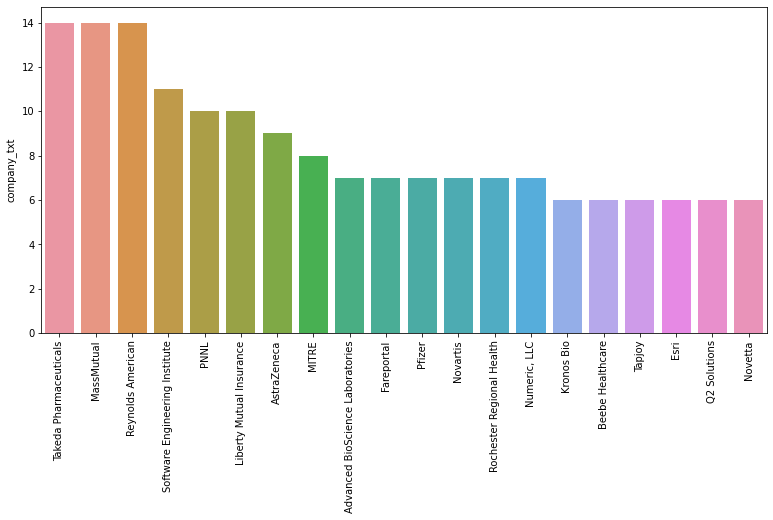

In [67]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    plt.figure(figsize=(13,6))
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [68]:
# make a pivot table to comare the cateregorical data with neumerical

In [70]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'aws_yn', 'job_simp',
       'seniority', 'job_desc_len', 'num_comp'],
      dtype='object')

In [78]:
pd.pivot_table(df, index=['job_simp','seniority'],values='average_salary')

average_salary
job_simp         seniority                
analyst          junior          53.250000
                 na              61.308219
                 senior          79.092593
data engineer    na              97.493976
                 senior         123.638889
data scientist   junior         106.500000
                 na             110.525510
                 senior         134.524390
director         na             168.607143
machine learning na             126.218750
                 senior         127.000000
manager          na              84.022727
na               na              76.885714
                 senior         110.204545

In [81]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state','job_simp'],values='average_salary').sort_values('job_state',ascending=False)

average_salary
job_state job_simp                        
WI        na                     54.000000
          data scientist        113.500000
          analyst                58.833333
WA        na                     97.500000
          data scientist         99.764706
          analyst                54.500000
VA        na                     79.300000
          machine learning       87.000000
          data scientist        108.416667
          data engineer          96.900000
          analyst                71.583333
UT        data engineer         100.333333
          analyst                54.750000
          data scientist        140.500000
TX        na                     41.285714
          data scientist        100.730769
          data engineer         113.062500
TN        data scientist         96.000000
          data engineer         100.950000
          analyst                13.500000
SC        na                     60.500000
RI        analyst               100.000000
PA        machine learning      120.500000
          data engineer          91.500000
          data scientist        113.333333
          analyst                62.750000
          manager               109.666667
          na                     76.062500
OR        data scientist         98.500000
          data engineer          73.000000
OH        na                     91.166667
          data scientist        105.285714
          analyst                53.875000
NY        na                     81.583333
          machine learning      125.000000
          data scientist        115.250000
          data engineer          86.375000
          analyst                65.607143
NM        data scientist         74.333333
NJ        data scientist        106.875000
          analyst                83.583333
          data engineer         112.000000
          manager               109.500000
          director              161.500000
          na                     82.500000
NE        na                     41.000000
NC        na                     90.916667
          data scientist        117.000000
          data engineer         104.250000
MO        na                     72.333333
          manager                40.500000
          data scientist        127.666667
          analyst                61.000000
MN        data engineer          95.000000
          analyst                76.000000
MI        manager                87.500000
          data scientist        106.625000
MD        na                     88.750000
          data scientist        109.115385
          data engineer         109.000000
          analyst                80.666667
MA        na                    107.478261
          manager                71.900000
          director              117.833333
          data scientist        113.750000
          data engineer         107.291667
          analyst                59.125000
LA        analyst                48.000000
          data engineer          70.500000
          na                     20.000000
KY        na                    103.500000
          data scientist         84.000000
KS        machine learning       87.000000
IN        na                     69.000000
          data scientist         84.500000
          data engineer         114.500000
IL        analyst                66.500000
          na                     57.166667
          machine learning      133.000000
          director              221.750000
          data scientist        117.233333
          data engineer          96.125000
ID        analyst                56.250000
IA        analyst                43.000000
          data engineer         102.833333
GA        data scientist         81.333333
          na                     80.000000
FL        data scientist         97.357143
          data engineer          91.833333
          analyst                47.500000
DE        na                     27.500000
DC        data scientist     

In [86]:
pd.pivot_table(df[df.job_simp == 'data scientist'],index='job_state',values='average_salary').sort_values('average_salary',ascending=False)

,average_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [87]:
#salary vs rating

In [88]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'aws_yn', 'job_simp',
       'seniority', 'job_desc_len', 'num_comp'],
      dtype='object')

In [94]:
df_pivots = df[['Rating','Industry','Sector','Revenue','num_comp','hourly','employer_provided','python_yn','R_yn','spark_yn','excel_yn','aws_yn','Type of ownership','average_salary']]

In [95]:
df_pivots.head(5)

,Rating,Industry,Sector,Revenue,num_comp,hourly,employer_provided,python_yn,R_yn,spark_yn,excel_yn,aws_yn,Type of ownership,average_salary
0,3.8,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,1,0,0,1,0,Company - Private,72.0
1,3.4,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,1,0,0,0,0,Other Organization,87.5
2,4.8,Security Services,Business Services,$100 to $500 million (USD),0,0,0,1,0,1,1,0,Company - Private,85.0
3,3.8,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,1,0,0,0,0,Government,76.5
4,2.9,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,1,0,0,1,0,Company - Private,114.5


In [100]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='average_salary').sort_values('average_salary',ascending=False))
    print('\n')

Rating
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286


Industry
                                          average_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.00

ValueError: Grouper for 'average_salary' not 1-dimensional

In [101]:
#pivot for revenue X python 
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='average_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [105]:
#example of the use of columns
pd.pivot_table(df_pivots, index='Revenue', columns='Sector', values='average_salary', aggfunc='count')

Sector,-1,Accounting & Legal,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,...,Manufacturing,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
Revenue,,,,,,,,,,,,,,,,,,,,,
$1 to $2 billion (USD),NaN,NaN,3.0,NaN,NaN,9.0,7.0,NaN,NaN,NaN,...,2.0,NaN,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN
$1 to $5 million (USD),NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$10 to $25 million (USD),NaN,NaN,1.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
$10+ billion (USD),NaN,NaN,9.0,NaN,NaN,45.0,1.0,NaN,NaN,NaN,...,16.0,3.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
$100 to $500 million (USD),NaN,NaN,6.0,NaN,4.0,9.0,12.0,NaN,NaN,1.0,...,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
$2 to $5 billion (USD),NaN,NaN,1.0,NaN,NaN,2.0,3.0,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,3.0,NaN,4.0,3.0,7.0
$25 to $50 million (USD),NaN,NaN,2.0,NaN,NaN,10.0,11.0,NaN,NaN,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
$5 to $10 billion (USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
$5 to $10 million (USD),NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# just for fun

In [107]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [114]:
# code for nltk if not working or showing error
import nltk
# import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')
# punkt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaishnavbharadwaj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaishnavbharadwaj/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

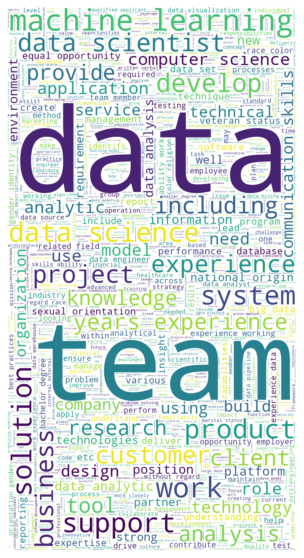

In [115]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    filetered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filetered.append(w.lower())
    return filetered

words_fileterd = punctuation_stop(words)

text = " ".join([ele for ele in words_fileterd])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()